# PyTorch Crash Course

Welcome to this PyTorch Crash Course! In this course, we'll cover everything from the basics of PyTorch (tensor and tensor manipulation) to more intermediate concepts such as building neural networks, culminating in a final project that fine-tunes a transformed based architecture (GPT2-Medium) for lyric completion. Let's get into it!

# PyTorch

PyTorch is an open-source deep learning framework developed by Facebook's AI Research lab. It's popular for its dynamic computation graph, which allows for flexible and interactive model design. PyTorch is widely used in academia, research, and industry for building deep learning models.


# Installation and Setup

In [62]:
# Uncomment and run this cell to install PyTorch
!pip install torch torchvision

## Basics of PyTorch: Tensors

Tensors are the primary data structures in PyTorch. They're akin to multi-dimensional arrays, and they form the backbone of many operations in deep learning. These tensors can be used to represent data in various dimensions:

- A 0-dimensional tensor is a scalar (a single number).
- A 1-dimensional tensor is a vector (like an array of numbers).
- A 2-dimensional tensor is a matrix.
- Tensors with three or more dimensions don't have special mathematical names but can be thought of as matrices with higher dimensions.

In PyTorch, tensors can be created and manipulated using a variety of functions. They can also be operated on CPUs and GPUs (not to mention TPUs!), making computations faster and more efficient, especially for large-scale data.

A crucial advantage of PyTorch tensors over NumPy arrays is their ability to run on GPUs. This accelerates computations manyfold, making PyTorch particularly suitable for modern deep learning tasks.

  Let's create some:

In [2]:
import torch

# Creating a scalar
scalar = torch.tensor(4.0)
print("Scalar:", scalar)

# Creating a vector
vector = torch.tensor([1, 2, 3, 4])
print("\nVector:", vector)

# Creating a matrix
matrix = torch.tensor([[1, 2], [3, 4], [5, 6]])
print("\nMatrix:", matrix)

# Creating a 3D tensor
tensor3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print("\n3D Tensor:", tensor3d)

Scalar: tensor(4.)

Vector: tensor([1, 2, 3, 4])

Matrix: tensor([[1, 2],
        [3, 4],
        [5, 6]])

3D Tensor: tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


### Tensor Attributes

Tensors have attributes that allow us to retrieve information about their nature:
- `dtype`: The data type of the tensor (e.g., `float32`, `int64`).
- `shape`: The dimensions of the tensor.
- `device`: The device on which the tensor is stored, either `cpu` or `gpu`.

In [3]:
print("Matrix Data Type:", matrix.dtype)
print("Matrix Shape:", matrix.shape)
print("Matrix Device:", matrix.device)

Matrix Data Type: torch.int64
Matrix Shape: torch.Size([3, 2])
Matrix Device: cpu


### Tensor Operations

Tensors support an abundance of operations, from basic arithmetic to advanced linear algebra. Let's explore some of these operations:

In [4]:
# Basic Arithmetic
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

# Element-wise addition
sum_ab = a + b
print("Element-wise Addition:", sum_ab)

# Element-wise multiplication
product_ab = a * b
print("\nElement-wise Multiplication:", product_ab)

# Dot product
dot_product = torch.dot(a, b)
print("\nDot Product:", dot_product)

# Matrix multiplication
mat1 = torch.tensor([[1, 2], [3, 4]])
mat2 = torch.tensor([[2, 0], [0, 2]])
mat_product = torch.mm(mat1, mat2)
print("\nMatrix Multiplication:\n", mat_product)

Element-wise Addition: tensor([5, 7, 9])

Element-wise Multiplication: tensor([ 4, 10, 18])

Dot Product: tensor(32)

Matrix Multiplication:
 tensor([[2, 4],
        [6, 8]])


### Reshaping Tensors

It's a common need in deep learning to reshape tensors. For example, when passing data through neural networks, the expected input shape of one layer might be different from the output shape of the previous layer.

`view()` and `reshape()` are two methods to achieve this. While they generally serve the same purpose, there are nuances in their behavior, especially concerning memory layout. However, for most purposes, they can be used interchangeably. For more information: https://saturncloud.io/blog/whats-the-difference-between-reshape-and-view-in-pytorch/


In [5]:
# Using view()
reshaped_matrix = matrix.view(2, 3)
print("matrix:\n", matrix)
print("\nmatrix reshaped using view(2,3) 3x2 -> 2x3:\n", reshaped_matrix)

# Using reshape()
reshaped_vector = vector.reshape(2, 2)
print("\nvector:\n", vector)
print("\nvector reshaped using reshape(2,2) 1x4 -> 2x2:\n", reshaped_vector)

matrix:
 tensor([[1, 2],
        [3, 4],
        [5, 6]])

matrix reshaped using view(2,3) 3x2 -> 2x3:
 tensor([[1, 2, 3],
        [4, 5, 6]])

vector:
 tensor([1, 2, 3, 4])

vector reshaped using reshape(2,2) 1x4 -> 2x2:
 tensor([[1, 2],
        [3, 4]])


### Broadcasting

Broadcasting is a powerful mechanism that allows PyTorch to work with tensors of different shapes when performing arithmetic operations. With broadcasting, the smaller tensor is 'broadcast' over the larger tensor so they have compatible shapes.

This is useful because it eliminates the need for manually reshaping tensors in many scenarios. For more information: https://pytorch.org/docs/stable/notes/broadcasting.html

Let's try it out:

In [6]:
# Broadcasting in action
x = torch.tensor([1, 2, 3])
y = 2  # Scalar

# This will multiply every element of 'x' by 'y'
result = x * y
print(result)

tensor([2, 4, 6])


### Tensor Indexing

Just like with Python lists and NumPy arrays, you can index and slice PyTorch tensors. This allows for selecting specific parts of a tensor, which is useful for data manipulation and preprocessing. For more information: https://deeplearninguniversity.com/pytorch/pytorch-tensor-indexing/


In [7]:
# Tensor Indexing
tensor = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Get the second row
second_row = tensor[1]
print("Second Row:", second_row)

# Get the first column - [row:column] -> [:, 0] -> ':' = all rows,
# '0' = 0th element of all rows (first column)
first_column = tensor[:, 0]
print("\nFirst Column:", first_column)

# Get the last two elements of the last row
sub_tensor = tensor[-1, -2:]
print("\nSub-tensor:", sub_tensor)

Second Row: tensor([4, 5, 6])

First Column: tensor([1, 4, 7])

Sub-tensor: tensor([8, 9])


### In-place Operations

PyTorch supports in-place operations, which modify tensors directly without creating a new one. Such operations are suffixed with an underscore (`_`). While they save memory by not creating new tensors, caution is needed, especially when computing gradients, as in-place modifications can sometimes hinder the process of computing gradients. For more information on in-place operations and its downsides: https://towardsdatascience.com/in-place-operations-in-pytorch-f91d493e970e


### Tensor to Numpy and Back

If you are unfamiliar with NumPy, NumPy is a library in Python that supports the use of "large, multi-dimensional arrays and matrices, as well as accompanying high-level mathematical functions to opperate on these arrays". PyTorch provides easy conversions between PyTorch tensors and NumPy arrays. This interoperability is particularly useful for data manipulation and preprocessing.


In [8]:
# Convert tensor to numpy array
numpy_arr = tensor.numpy()
print("Numpy Array:\n", numpy_arr)

# Convert numpy array back to tensor
new_tensor = torch.from_numpy(numpy_arr)
print("\nTensor:\n", new_tensor)

Numpy Array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Tensor:
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


### Using GPUs

One of the strengths of PyTorch is its ability to perform computations on GPUs. This is especially useful for deep learning tasks, as GPUs can significantly accelerate these computations. Moving tensors between the CPU and GPU is a line of code away!


In [9]:
# Check if CUDA (GPU interface) is available
if torch.cuda.is_available():
    # Move tensor to GPU
    tensor_gpu = tensor.cuda()
    print("Tensor on GPU: ", tensor_gpu.device)
else:
    print("CUDA not available. Cannot move tensor to GPU.")


Tensor on GPU:  cuda:0


## Building Basic Neural Networks with PyTorch

Now that we've explored tensors, let's explore one of the most exciting aspects of working with PyTorch: building neural networks! PyTorch provides the `nn` module, a comprehensive suite of tools to create and train neural networks. Let's start by understanding the basic components:

### Layers

Neural networks are composed of layers. Each layer contains neurons that process some input and produce an output. PyTorch's `nn` module provides pre-defined layers that can be easily plugged into models. We'll discuss a few common ones:

#### Linear (Fully Connected) Layers

The Linear layer, often termed as "fully connected layer", connects every neuron from the previous layer to every neuron in the current layer. It is the most fundamental layer in neural networks and is utilized in a wide variety of architectures, from simple feed-forward networks to more complex models.


In [10]:
import torch.nn as nn

# A linear layer with 5 input features and 3 output features
linear_layer = nn.Linear(in_features=5, out_features=3)
print(linear_layer)

Linear(in_features=5, out_features=3, bias=True)


#### Convolutional Layers

Convolutional layers are the cornerstone of Convolutional Neural Networks (CNNs). They are specially designed to recognize patterns in images, such as edges, corners, textures, etc. Unlike fully connected layers, they look for patterns in local regions of the input, making them more efficient for image data.


In [11]:
# A 2D convolutional layer with 1 input channel, 3 output channels, and a kernel size of 3
conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3)
print(conv_layer)

Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))


#### Pooling Layers

Pooling layers are often used after convolutional layers in CNNs. They reduce the spatial dimensions (width, height) of the input, making the network less computationally intensive and more invariant to small translations in the image. The most common type of pooling is MaxPooling, which takes the maximum value in a local region of the input.


In [12]:
# A 2D max pooling layer with a kernel size of 2 and stride of 2
pooling_layer = nn.MaxPool2d(kernel_size=2, stride=2)
print(pooling_layer)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


#### Linear Layer Example

Now that we've introduced a few different types of layers, let's delve into a more in-depth example using the Linear layer. We'll demonstrate how data passes through this layer and how it transforms the input. Remember, a Linear layer essentially learns a linear transformation of the data. It multiplies the input with learned weights and adds a bias term.


In [13]:
# Define a linear layer
# Input features = 2 (for simplicity, consider this as 2D data points: x and y coordinates)
# Output features = 1 (a transformed single value for each 2D data point)
linear = nn.Linear(2, 1)

# Let's print out the initial weights and bias - set initially to random values
print("Initial weights:", linear.weight)
print("Initial bias:", linear.bias)

Initial weights: Parameter containing:
tensor([[0.2805, 0.4429]], requires_grad=True)
Initial bias: Parameter containing:
tensor([0.3375], requires_grad=True)


The Linear layer has initialized weights and biases. These values will be learned and adjusted during the training process to minimize the loss. For now, let's see how our layer transforms a sample input using these initial values:

In [14]:
# Sample input: Two 2D points
input_data = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Pass the data through the linear layer
output_data = linear(input_data)

print("Transformed Data:", output_data)

Transformed Data: tensor([[1.5038],
        [2.9505]], grad_fn=<AddmmBackward0>)


As you can see, our 2D data points are transformed into 1D values. The transformation is a result of the matrix multiplication between the input data and the layer's weights, followed by the addition of the bias term.

This example provides a basic understanding of how data flows through a Linear layer. When building neural networks, these layers are stacked together, often with activation functions in between, to learn more complex and nuanced transformations from the input to the output. For more information: https://ecoagi.ai/topics/Python/nn-linear

### Activation Functions

After processing input through a layer, it's common to pass the output through an activation function. These functions introduce non-linearity into the model, enabling it to learn complex patterns. Popular activation functions include ReLU, Sigmoid, and Tanh. Let's focus on ReLU. Here's the ReLU activation function:

- $ \text{ReLU}(x) = \max(0, x)$



In [15]:
# Define a ReLU activation function
relu = nn.ReLU()

# Sample tensor
x = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])

# Pass tensor through ReLU - passing through every element (say x) in tensor: if
# less than 0, return 0, else return x
activated_x = relu(x)
print(activated_x)

tensor([0., 0., 0., 1., 2.])


### Building a Simple Feed-forward Neural Network

With knowledge of layers and activation functions, we can now assemble them into a neural network. Here, we'll construct a basic feed-forward neural network, also known as a multi-layer perceptron (MLP). An MLP is a type of neural network where information flows in one direction: from the input layer, through hidden layers, to the output layer. There are no loops or cycles in the network. For more information about MLPs: https://towardsdatascience.com/multilayer-perceptron-explained-with-a-real-life-example-and-python-code-sentiment-analysis-cb408ee93141 (code written in sklearn, but same idea conceptually). Let's build a simple MLP with one hidden layer:

In [16]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 3)  # Input layer with 2 features, outputs 3 values
        self.fc2 = nn.Linear(3, 1)  # Hidden layer with 3 input values, outputs 1 value

    def forward(self, x):
        x = nn.ReLU()(self.fc1(x))
        return self.fc2(x)

# Instantiating the network
mlp = MLP()
print(mlp)

MLP(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=1, bias=True)
)


Now that our network is defined, we need a loss function to measure how well our network is performing. Since our task is a regression (predicting a continuous value), we'll use Mean Squared Error (MSE) as our loss function. Additionally, we'll define an optimizer to adjust the weights of our network based on this loss.

In [17]:
import torch.optim as optim
# Defining a mean squared error loss
mse_loss = nn.MSELoss()

# Defining an SGD optimizer
optimizer = optim.SGD(mlp.parameters(), lr=0.01)

With our network, loss function, and optimizer in place, let's create some example data to demonstrate how this MLP works. We are creating a simple example of how neural networks can approximate functions (in this case a very trivial example of summing two numbers together!).

In [18]:
# Generate some synthetic data
# Input: 10 samples with 2 features each
inputs = torch.rand(10, 2)

# Target: A simple function of the inputs (sum of the two features)
# This will be our ground truth for training
targets = inputs.sum(dim=1, keepdim=True)

print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[0.2043, 0.9169],
        [0.8721, 0.6896],
        [0.8142, 0.5720],
        [0.0549, 0.9922],
        [0.3759, 0.5397],
        [0.1375, 0.1726],
        [0.2875, 0.4938],
        [0.0281, 0.8853],
        [0.2009, 0.1033],
        [0.2137, 0.3116]])

Targets:
 tensor([[1.1212],
        [1.5617],
        [1.3862],
        [1.0471],
        [0.9156],
        [0.3100],
        [0.7813],
        [0.9134],
        [0.3042],
        [0.5253]])


Now, let's train our MLP on this data for a few epochs. An epoch is one complete forward and backward pass of all training samples. Remember:

- A **forward pass** is when you input your data into the model to get the predictions. This involves passing the input data through each layer of the neural network and applying the associated weights and biases to produce the final output (predictions).

- A **backward pass** (often referred to as backpropagation) is the process by which the neural network adjusts its weights and biases in response to the error in its predictions. This involves calculating the gradient of the loss function with respect to the model's weights and biases and updating them in a direction that reduces the error. The magnitude of this update is determined by the learning rate.

During each epoch, the model will make predictions (forward pass), calculate the loss (difference between predictions and actual values), and then update its weights and biases to reduce the loss (backward pass).

In [19]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = mlp(inputs)
    loss = mse_loss(outputs, targets)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 20 epochs
    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [20/100], Loss: 0.1386
Epoch [40/100], Loss: 0.0340
Epoch [60/100], Loss: 0.0270
Epoch [80/100], Loss: 0.0252
Epoch [100/100], Loss: 0.0237


After training, our network has adjusted its weights to minimize the loss. You can now pass new data through this trained MLP to make predictions. This hands-on example provides a glimpse into the process of defining, training, and using a neural network in PyTorch.

### Testing the Trained MLP

After training our model, it's crucial to test its performance on new, unseen data. This allows us to evaluate how well our model generalizes beyond the training data. Let's generate some test data and see how our MLP predicts the target values.

In [20]:
# Generate synthetic test data
test_inputs = torch.rand(5, 2)
test_targets = test_inputs.sum(dim=1, keepdim=True)

# Predict using the trained model
test_outputs = mlp(test_inputs)

print("Test Inputs:\n", test_inputs)
print("\nTrue Test Targets:\n", test_targets)
print("\nPredicted Test Targets:\n", test_outputs)

Test Inputs:
 tensor([[0.9294, 0.7881],
        [0.6182, 0.4253],
        [0.6256, 0.7128],
        [0.1772, 0.3841],
        [0.8534, 0.0169]])

True Test Targets:
 tensor([[1.7175],
        [1.0435],
        [1.3384],
        [0.5613],
        [0.8703]])

Predicted Test Targets:
 tensor([[1.3689],
        [0.9260],
        [1.1703],
        [0.7255],
        [0.5708]], grad_fn=<AddmmBackward0>)


By comparing the true test targets with the predicted values, we can now get a precise sense of how close our model's predictions are to the actual values. Remember, the closer the predictions are to the true targets, the better our model is performing on the test data.

### Datasets

In PyTorch, a dataset is represented by a class that extends the `Dataset` class. This class requires two essential methods to be implemented:
- `__len__()`: Returns the number of samples in the dataset.
- `__getitem__()`: Allows indexing to fetch a specific data sample.

Let's explore a simple custom dataset:

In [21]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Example usage
data_samples = torch.randn(10, 2)  # 10 samples with 2 features each
labels = torch.randint(0, 2, (10,))  # Binary labels for each sample

dataset = CustomDataset(data_samples, labels)

# Fetch the fourth sample - (tensor with 2 features, binary classification tensor)
print(dataset[3])

(tensor([1.1058, 0.2856]), tensor(1))


### DataLoaders

While `Dataset` provides a representation of data, `DataLoader` wraps a dataset and provides utilities to create batches of data, shuffle the data, and load data in parallel. It's an essential tool for training models, as it feeds data in manageable chunks, allowing for efficient memory usage and faster training. For more information about `DataLoader` and the different types of datasets included in the PyTorch library: https://blog.paperspace.com/dataloaders-abstractions-pytorch/

In [22]:
from torch.utils.data import DataLoader

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Iterate over the dataloader to fetch batches
for batch_data, batch_labels in dataloader:
    print("Batch data:", batch_data)
    print("Batch labels:", batch_labels)
    break  # Just print the first batch for demonstration

Batch data: tensor([[-1.9449, -0.2543],
        [-0.0483,  0.7800],
        [-0.3012, -0.4856],
        [ 0.5865,  0.8241]])
Batch labels: tensor([0, 0, 0, 1])


## Building Advanced Neural Networks with PyTorch

Now that we've explored some of the basics of building basic neural networks in PyTorch, let's journey into making more advanced neural networks!

### Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) have revolutionized the field of computer vision. They're designed to automatically and adaptively learn spatial hierarchies of features from images. CNNs are characterized by their use of convolutional layers, which apply convolutional filters to the input data. For a more in-depth look at CNNs: https://colah.github.io/posts/2014-07-Conv-Nets-Modular/

In [23]:
# A simple CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3)  # First convolutional layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Pooling layer
        self.fc1 = nn.Linear(16 * 13 * 13, 10)  # Fully connected layer (for a 28x28 input image)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = x.view(-1, 16 * 13 * 13)
        x = nn.ReLU()(self.fc1(x))
        return x

cnn = SimpleCNN()
print(cnn)

SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2704, out_features=10, bias=True)
)


### Recurrent Neural Networks (RNNs)

Recurrent Neural Networks (RNNs) are designed to recognize patterns in sequences of data, such as text, genomes, and time series data. They maintain a 'memory' of previous inputs in their internal state, allowing them to produce output influenced by the entire observed sequence. For more (a lot more) information, check out this blog post by Andrej Karpathy: http://karpathy.github.io/2015/05/21/rnn-effectiveness/

In [24]:
# A simple RNN architecture
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

rnn = SimpleRNN(input_size=10, hidden_size=20, output_size=2)
print(rnn)

SimpleRNN(
  (rnn): RNN(10, 20, batch_first=True)
  (fc): Linear(in_features=20, out_features=2, bias=True)
)


### CNN Example: Cat vs. Dog Image Classification using CIFAR-10

While CIFAR-10 contains 10 classes, for our binary classification task, we'll focus on just two: cats and dogs. Let's first load and preprocess the CIFAR-10 dataset, filtering out only the images of cats and dogs.

In [25]:
from torchvision import transforms, datasets

# Defining transformations for the dataset
# 1. Convert image data to a PyTorch tensor
# 2. Normalize the image data to have values between -1 and 1
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Downloading the CIFAR-10 dataset
# - root: Specifies the directory where the dataset will be stored
# - train: Specifies whether to download the training set or the test set
# - download: If True, downloads the dataset from the internet
# - transform: Specifies the transformations to be applied on the data

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Filter the dataset to retain only images of cats and dogs
# In CIFAR-10, cats are labeled as 3 and dogs as 5

# For the training dataset
# Filter images
train_dataset.data = train_dataset.data[(train_dataset.targets == 3) | (train_dataset.targets == 5)]
# Adjust labels: Set dogs (label 5) as 1 and cats (label 3) as 0
train_dataset.targets = [1 if label == 5 else 0 for label in train_dataset.targets if label == 3 or label == 5]

# For the test dataset
# Filter images
test_dataset.data = test_dataset.data[(test_dataset.targets == 3) | (test_dataset.targets == 5)]
# Adjust labels: Set dogs (label 5) as 1 and cats (label 3) as 0
test_dataset.targets = [1 if label == 5 else 0 for label in test_dataset.targets if label == 3 or label == 5]

100%|██████████| 170498071/170498071 [00:03<00:00, 42635513.85it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


With our data loaded and preprocessed, we can now define a simple CNN model suitable for the CIFAR-10 dataset's image dimensions.

### Building the CNN Model

For our binary classification task (Cat vs. Dog), we'll construct a simple CNN model. This model will have a couple of convolutional layers followed by pooling layers, and finally some fully connected layers for classification.

In [26]:
import torch.nn as nn
import torch.nn.functional as F

class CatDogCNN(nn.Module):
    def __init__(self):
        super(CatDogCNN, self).__init__()
        # First convolutional layer (3 input channels, 16 output channels, 3x3 kernel)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # Second convolutional layer (16 input channels, 32 output channels, 3x3 kernel)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # Pooling layer to reduce spatial dimensions by half
        self.pool = nn.MaxPool2d(2, 2)
        # Fully connected layer (32 channels * 8 * 8 image size to 256 nodes)
        self.fc1 = nn.Linear(32 * 8 * 8, 256)
        # Final output layer (from 256 nodes to 2 nodes - Cat & Dog)
        self.fc2 = nn.Linear(256, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the CNN model
model = CatDogCNN()
print(model)

CatDogCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=2, bias=True)
)


### Training the CNN Model

With our model defined, it's time to train it on our Cat vs. Dog dataset. Training involves:
1. Passing input data through the model (forward pass).
2. Calculating the loss using the predictions and actual labels.
3. Backpropagating the error and adjusting the model weights.

In [27]:
# Filter the dataset for only cats (class label 3) and dogs (class label 5)
def filter_cats_dogs(data, targets):
    filtered_data = [data[i] for i, label in enumerate(targets) if label in [3, 5]]
    # Adjust labels: Set dogs (label 5) as 1 and cats (label 3) as 0
    filtered_targets = [1 if label == 5 else 0 for label in targets if label in [3, 5]]
    return filtered_data, filtered_targets

# Redownload and initialize the CIFAR-10 dataset
original_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
original_test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Use the filter_cats_dogs function to filter the dataset
train_dataset.data, train_dataset.targets = filter_cats_dogs(original_train_dataset.data, original_train_dataset.targets)
test_dataset.data, test_dataset.targets = filter_cats_dogs(original_test_dataset.data, original_test_dataset.targets)

# Check the lengths after filtering
print("Length of filtered training dataset:", len(train_dataset.data))
print("Length of filtered test dataset:", len(test_dataset.data))

# Define DataLoader for the training dataset
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Since it's a classification problem with 2 classes
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Using the Adam optimizer with a learning rate of 0.001

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(images)
        # Calculate loss
        loss = criterion(outputs, labels)
        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

print("Finished Training!")

Files already downloaded and verified
Files already downloaded and verified
Length of filtered training dataset: 10000
Length of filtered test dataset: 2000
Epoch 1/10, Loss: 0.6245547389260496
Epoch 2/10, Loss: 0.5472287994604141
Epoch 3/10, Loss: 0.5008013965413213
Epoch 4/10, Loss: 0.4596219630287097
Epoch 5/10, Loss: 0.4108318118527294
Epoch 6/10, Loss: 0.352888639218891
Epoch 7/10, Loss: 0.2912300823690792
Epoch 8/10, Loss: 0.226358330644929
Epoch 9/10, Loss: 0.15721397754697564
Epoch 10/10, Loss: 0.09762207758479034
Finished Training!


### Evaluating the CNN Model

After training, it's essential to evaluate our model's performance on unseen data. We'll assess our model using the test dataset and compute the accuracy of the predictions.

In [28]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_dataset:
        outputs = model(images.unsqueeze(0))  # Add batch dimension
        _, predicted = torch.max(outputs.data, 1)
        total += 1  # Since labels is an integer, just increment total by 1
        correct += (predicted.item() == labels)

print(f"Accuracy on test data: {100 * (correct / total)}%")

Accuracy on test data: 75.35%


Try it for yourself!

In [29]:
import requests
from PIL import Image
from io import BytesIO
import torchvision.transforms as transforms

def predict_from_url(url, model):
    # Fetch image from the internet
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    # Process the image
    transform = transforms.Compose([
        transforms.Resize((32, 32)),  # Assuming the model expects 32x32 images
        transforms.ToTensor(),
        # Add any other required preprocessing steps here
    ])
    img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

    # Get the model's prediction
    with torch.no_grad():
        output = model(img_tensor)
        _, predicted = torch.max(output.data, 1)
        if predicted.item() == 1:
            return "Dog"
        else:
            return "Cat"

# Example usage:
url = "https://cdn.britannica.com/79/232779-050-6B0411D7/German-Shepherd-dog-Alsatian.jpg"
print(predict_from_url(url, model))

Dog


## Regularization and Optimization Techniques

As we build deeper and more complex neural networks, there's a risk of overfitting, where our model performs exceptionally well on the training data but poorly on unseen data. Regularization techniques help prevent overfitting, making the model more generalizable. Additionally, optimization techniques can aid in faster and more stable training.

In this section, we will explore some of these techniques, including Dropout, Batch normalization, and Learning rate scheduling.

### Dropout

Dropout is a regularization technique that can help prevent overfitting in neural networks. During training, dropout is implemented by only keeping a neuron active with some probability $ p$ (a hyperparameter), or setting it to zero otherwise. By "dropping out" a random set of activations in this way, we ensure that no single neuron can memorize the data, making the model more robust.

The probability $ p$ is the fraction of the input units to drop. For example, if $ p$ is set to 0.5, then roughly half of the input units will be dropped out during training. For a visual understanding of it: https://www.youtube.com/watch?v=ARq74QuavAo

Let's see how to implement dropout in PyTorch.

In [30]:
class DropoutNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DropoutNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        # Dropout layer: during training, randomly sets approximately 50% of its input units to 0
        # to prevent over-reliance on any individual neuron.
        self.dropout = nn.Dropout(0.5)  # 0.5 is the probability of dropping an activation
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # apply dropout during training
        x = self.fc2(x)
        return x

# Instantiate the model with dropout
dropout_model = DropoutNN(input_size=784, hidden_size=256, output_size=10)
print(dropout_model)

DropoutNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


### Batch Normalization

Batch normalization is an optimization technique designed to stabilize and accelerate the training of deep neural networks. Here's how it works:

1. **Normalization**: During training, for each mini-batch, batch normalization computes the mean and variance of the activations of a layer. It then normalizes the activations to have a mean of zero and a standard deviation of one.
2. **Scaling and Shifting**: After normalization, batch normalization introduces two learnable parameters, scale and shift, for each activation. This allows the model to scale and shift the normalized activations if it determines that the original mean and variance were beneficial.

The key benefits of batch normalization are:

- **Smoothing the Optimization Landscape**: One of the primary benefits of batch normalization is that it smooths the optimization landscape, making the loss surface more tractable for gradient-based optimization methods. This can lead to faster training and less sensitivity to the initialization of weights.
- **Faster Convergence**: By ensuring that activations have a consistent distribution, the training process becomes more stable, allowing for higher learning rates and faster convergence.
- **Acts as a Regularizer**: Batch normalization can also serve as a form of regularization. The noise introduced during training, due to the use of mini-batch statistics, can improve generalization in some cases, reducing the need for other regularization techniques like dropout.
- **Mitigating Internal Covariate Shift**\*: Originally, it was believed that batch normalization primarily worked by reducing internal covariate shift, which refers to the change in the distribution of layer activations as the network trains. While normalization does address this, recent research suggests that this might not be the primary reason for the effectiveness of BatchNorm. Nonetheless, it's a point of consideration.

For a visual understanding of Batch Normalization: https://www.youtube.com/watch?v=DtEq44FTPM4

With this understanding, let's see how batch normalization is implemented in PyTorch.

In [31]:
class BatchNormNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BatchNormNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        # Batch normalization layer for the hidden layer
        self.batchnorm = nn.BatchNorm1d(hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.batchnorm(x)  # apply batch normalization
        x = F.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the model with batch normalization
batchnorm_model = BatchNormNN(input_size=784, hidden_size=256, output_size=10)
print(batchnorm_model)

BatchNormNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (batchnorm): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


### Learning Rate Scheduling

The learning rate is one of the most crucial hyperparameters to set in training deep neural networks. It determines the step size at each iteration while moving towards a minimum of the loss function. Set it too high, and the algorithm might overshoot the minimum; too low, and the training might become exceedingly slow.

Learning Rate Scheduling provides a solution to adapt the learning rate during training. Instead of using a fixed learning rate, we adjust it over time. This allows us to start with a larger learning rate, which decreases as we get closer to the minimum, ensuring faster convergence and better final performance.

There are various strategies for learning rate scheduling, such as Step Decay, Exponential Decay, and Cosine Annealing. In this section, we will explore Step Decay and implement it!

For a visual understanding of the different types of learning rate decay: https://www.youtube.com/watch?v=QzulmoOg2JE

### StepLR - Step Decay Learning Rate

Step Decay is a strategy where the learning rate is reduced by a factor every few epochs. For instance, if our initial learning rate is 0.1 and we have a decay factor (often called gamma) of 0.1, the learning rate will drop to 0.01 after a specified number of epochs, referred to as the `step_size`. This approach allows the model to make larger updates at the beginning of the training, capturing coarse-grained features, and then make smaller, fine-tuning updates later on to refine its understanding.

In PyTorch, we can implement Step Decay with the `StepLR` scheduler. The step_size parameter determines the epoch interval at which the learning rate will be reduced.


In [32]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from torch.optim.lr_scheduler import StepLR

# Data loading and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load only a subset of MNIST for faster demonstration
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# Use only 1/10 of the dataset
train_subset, _ = random_split(train_dataset, [len(train_dataset) // 10, len(train_dataset) - len(train_dataset) // 10])
train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)

# Define a simple model for demonstration
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(28*28, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.fc(x)

# Instantiate the model, criterion, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)  # initial learning rate set to 0.1

# Define StepLR scheduler with a smaller step size
scheduler = StepLR(optimizer, step_size=5)

# Training loop with learning rate scheduling over fewer epochs
num_epochs = 15
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}, Learning Rate: {scheduler.get_last_lr()[0]}")
    scheduler.step()

100%|██████████| 9912422/9912422 [00:00<00:00, 167978599.49it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 26823670.02it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 43884508.81it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3735397.80it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/15, Loss: 2.2600, Learning Rate: 0.1
Epoch 2/15, Loss: 0.5444, Learning Rate: 0.1
Epoch 3/15, Loss: 0.4701, Learning Rate: 0.1
Epoch 4/15, Loss: 0.3937, Learning Rate: 0.1
Epoch 5/15, Loss: 0.3832, Learning Rate: 0.1
Epoch 6/15, Loss: 0.2708, Learning Rate: 0.010000000000000002
Epoch 7/15, Loss: 0.2649, Learning Rate: 0.010000000000000002
Epoch 8/15, Loss: 0.2619, Learning Rate: 0.010000000000000002
Epoch 9/15, Loss: 0.2602, Learning Rate: 0.010000000000000002
Epoch 10/15, Loss: 0.2584, Learning Rate: 0.010000000000000002
Epoch 11/15, Loss: 0.2560, Learning Rate: 0.0010000000000000002
Epoch 12/15, Loss: 0.2539, Learning Rate: 0.0010000000000000002
Epoch 13/15, Loss: 0.2540, Learning Rate: 0.0010000000000000002
Epoch 14/15, Loss: 0.2533, Learning Rate: 0.0010000000000000002
Epoch 15/15, Loss: 0.2532, Learning Rate: 0.0010000000000000002


## Transfer Learning in PyTorch

Transfer learning is a machine learning technique where a model, developed for a particular task, is reused as a starting point for a model on a second task. It's a popular approach in deep learning because it can train deep neural networks with comparatively little data. This is very useful, as most real-world datasets are typically much smaller than the massive datasets (like ImageNet) used to train popular models.

The core idea is to leverage the features learned from one task and apply them to another. In the context of neural networks, this means using the architecture and weights of a pre-trained model and adapting them to a new task.

There are two main approaches in transfer learning:

1. **Feature Extraction**: Here, we freeze all the layers of the pre-trained model except the final fully connected layer. This last layer is replaced with a new one that matches the number of classes in the new dataset and is trained from scratch.
2. **Fine-tuning**: In this approach, we unfreeze some or all of the layers of the pre-trained model and train them on the new data. This can help in adapting the pre-trained features more closely to the new task.
Let's see how to perform transfer learning using PyTorch.

For more information about approaches to transfer learning and its significance: https://builtin.com/data-science/transfer-learning

In [33]:
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Load and preprocess an even smaller subset of CIFAR-10
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

full_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_size = int(0.02 * len(full_dataset))  # Using only 2% of the dataset
_, train_subset = random_split(full_dataset, [len(full_dataset) - train_size, train_size])
train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)

# Load a pre-trained model (using AlexNet for faster computation)
model = models.alexnet(pretrained=True)

# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Modify the final layer
model.classifier[6] = nn.Linear(model.classifier[6].in_features, 10)

# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.classifier[6].parameters(), lr=0.001)

# Shortened training loop
for epoch in range(2):  # Reduced to 2 epochs
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/2, Loss: {avg_loss:.4f}")

Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:00<00:00, 284MB/s]


Epoch 1/2, Loss: 2.0929
Epoch 2/2, Loss: 1.6876


In [34]:
# Split the CIFAR-10 dataset into training, validation, and test subsets
val_size = int(0.02 * len(full_dataset))  # Using 2% for validation
test_size = len(full_dataset) - train_size - val_size
train_subset, val_subset, test_subset = random_split(full_dataset, [train_size, val_size, test_size])

val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)

# Evaluate the model's performance on the validation set
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the validation images: {accuracy:.2f}%')

Accuracy of the model on the validation images: 52.40%


Keep in mind:

- A randomly initialized model (without any training) would have an accuracy of about 10% since there are 10 classes.
- A modest transfer learning approach like this, with only 2% of the data and 2 epochs, might achieve accuracies in the range of 40-60%, depending on various factors like the specific samples in the 2%.
- More sophisticated models trained on the entire CIFAR-10 dataset can achieve accuracies above 90%.

## Advanced Applications with Real-world Data

### Text Classification with LSTMs

Text classification is a staple task in Natural Language Processing (NLP). The goal is to take a text input and assign it to one of the predefined classes. Examples of text classification include spam detection, sentiment analysis, and topic assignment.

Long Short-Term Memory (LSTM) networks, a type of Recurrent Neural Network (RNN), are particularly well-suited for sequence-based tasks, including text classification. This is due to their capability to remember long-term dependencies in the data.

In [35]:
!pip install 'portalocker>=2.0.0'

In [36]:
from torchtext.data.utils import get_tokenizer
from torchtext.datasets import IMDB
from sklearn.model_selection import train_test_split
from torchtext.vocab import build_vocab_from_iterator, GloVe
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

# Define the tokenizer
tokenizer = get_tokenizer('spacy', language='en_core_web_sm')

# Load the raw IMDB dataset
raw_train_data, raw_test_data = IMDB()

# Tokenize and preprocess the data
def tokenize_and_preprocess(dataset):
    tokenized_data = []
    for label, text in dataset:
        tokens = tokenizer(text)
        # Convert to lowercase
        tokens = [token.lower() for token in tokens]
        tokenized_data.append((tokens, label))
    return tokenized_data

train_data = tokenize_and_preprocess(raw_train_data)
test_data = tokenize_and_preprocess(raw_test_data)

train_data, valid_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Define a function to return the tokenized data iterator
def yield_tokens(data_iter):
    for text, _ in data_iter:
        yield from text

# Build vocabulary with vectors directly
vocab = build_vocab_from_iterator(yield_tokens(train_data), specials=['<unk>', '<pad>'])

# Define the custom collate function
def collate_batch(batch):
    label_list, text_list, lengths_list = [], [], []
    for (_text, _label) in batch:
        label_list.append(label_pipeline(_label))
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        text_list.append(processed_text)
        lengths_list.append(processed_text.size(0))
    return torch.tensor(label_list, dtype=torch.float64), pad_sequence(text_list, padding_value=2.0), torch.tensor(lengths_list, dtype=torch.int64)

# Define the text and label pipelines
def text_pipeline(text):
    return [vocab[token] for token in text]

def label_pipeline(label):
    return 1 if label == 'pos' else 0

# Create data loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, collate_fn=collate_batch)
valid_loader = DataLoader(valid_data, batch_size=64, shuffle=False, collate_fn=collate_batch)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False, collate_fn=collate_batch)

class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, pad_idx):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text, text_lengths):
        embedded = self.embedding(text)
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths)
        packed_output, (hidden, cell) = self.rnn(packed_embedded)
        return self.fc(hidden.squeeze(0))

# Note: Training the model would be the next step, but for conciseness, we're showcasing the setup here.

### Other Examples of Advanced Applications

**Sentiment Analysis**

Sentiment Analysis is an NLP sub-field aiming to deduce sentiment or emotion from text. Commonly applied to customer feedback, its primary goal is to categorize sentiment into classes like positive, negative, or neutral. For hands-on practice, the IMDB movie review dataset is a popular choice.

**Image Segmentation**

In Image Segmentation, images are divided into multiple segments or "super-pixels", converting them into more analyzable representations. Unlike image classification, which tags an entire image with one label, segmentation classifies each pixel. It can be:

- **Semantic Segmentation**: Classifying each pixel based on the class of its enclosing object or region.
- **Instance Segmentation**: Identifying each object instance per pixel.

**Object Detection**

Object Detection, a computer vision task, locates and classifies objects in images. It provides bounding boxes for detected objects, coupled with its class label. Several architectures cater to object detection, such as Faster R-CNN, YOLO, and SSD.

### Training a Pre-trained Object Detector using Faster R-CNN

Now that we've decided on object detection as our project focus, we'll be leveraging a pre-trained model for our task. Utilizing a pre-trained model, especially on tasks as complex as object detection, saves a significant amount of time and computational resources. Instead of training a model from scratch, we can use a model trained on a large dataset and fine-tune or directly deploy it for our specific use case.

**Faster R-CNN** is one of the state-of-the-art architectures for object detection. It effectively combines the strengths of both Region-based Convolutional Networks (R-CNN) and Fast R-CNN, offering speed and accuracy.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 208MB/s]


<PIL.Image.Image image mode=RGB size=1000x725 at 0x7F267004C9A0>


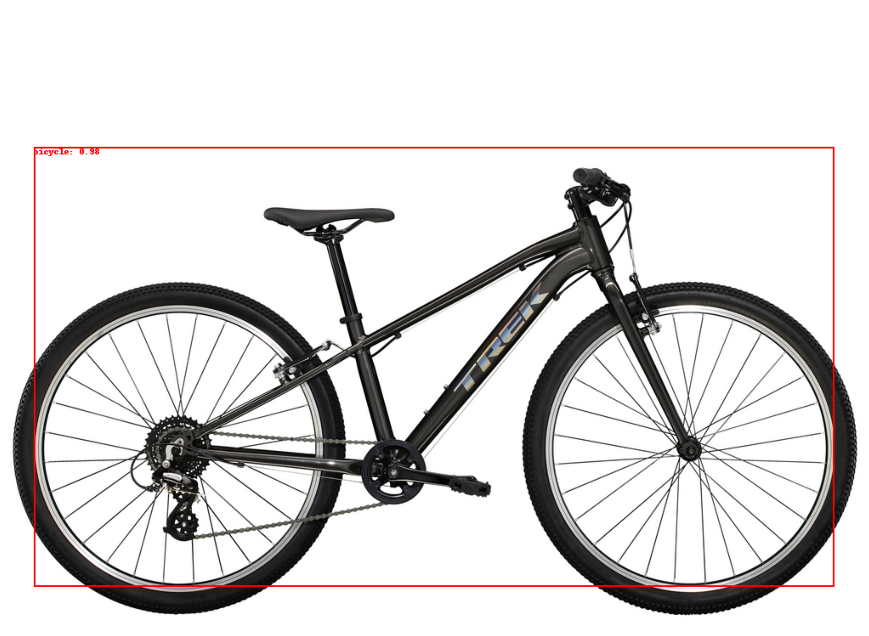

In [37]:
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO

# Load a pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load an image
def load_image_from_url(url):
    """
    Loads an image from a given URL.
    """
    response = requests.get(url)
    return Image.open(BytesIO(response.content)).convert("RGB")

# Input an image url - An example of a bicycle is given
image_url = 'https://image-and-file-storage.storage.googleapis.com/images/library/large/trek-wahoo-26-345352-3363194-1.png'  # Bicycle Example
image = load_image_from_url(image_url)


# Apply transformations and pass image through the model
transform = torchvision.transforms.ToTensor()
image_tensor = transform(image).unsqueeze(0)
predictions = model(image_tensor)

COCO_CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def visualize_detection(img, prediction):
    image_copy = img.copy()
    draw = ImageDraw.Draw(image_copy)
    boxes = prediction[0]['boxes'].detach().numpy()
    scores = prediction[0]['scores'].detach().numpy()
    labels = prediction[0]['labels'].detach().numpy()

    # Define the threshold for scores. Only boxes with scores above this threshold will be drawn.
    threshold = 0.5

    # Use default font with specified size
    font = ImageFont.load_default()

    for box, score, label in zip(boxes, scores, labels):
        if score > threshold:
            draw.rectangle(list(box), outline='red', width=2)
            draw.text((box[0], box[1]), f"{COCO_CLASSES[label]}: {score:.2f}", fill='red', font=font)
    return image_copy

# Get the visualized image
result_image = visualize_detection(image, predictions)
print(result_image)
result_image.show()
# Display the visualized image using matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(result_image)
plt.axis('off')
plt.show()

## Saving and Loading Trained Models:

Once a model is trained, you'd want to save its architecture and trained parameters (weights) so that you can reuse it later without having to retrain it. This is especially true for models that take a long time to train.

PyTorch Documentation for Saving and Loading Trained Models: https://pytorch.org/tutorials/beginner/saving_loading_models.html

Saving the weights of a simple neural network:

In [38]:
%%writefile model.py

import torch

# Define a simple neural network model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(10, 1)

    def forward(self, x):
        return self.fc(x)

model = SimpleModel()

# Generating random data to simulate training
inputs = torch.randn(100, 10)
targets = torch.randn(100, 1)

# Training the model for a few iterations
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

for _ in range(10):  # Train for 10 epochs
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

# Saving the model weights to 'model_weights.pth'
torch.save(model.state_dict(), 'model_weights.pth')  # Saving in the persistent storage directory


Writing model.py


In [39]:
with open('model.py', 'r') as f:
    code = f.read()
    exec(code)

In [40]:
# Assuming model is the defined model architecture
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()  # Ensure the model is in evaluation mode

SimpleModel(
  (fc): Linear(in_features=10, out_features=1, bias=True)
)

The model.eval() call is crucial when your model has layers like dropout or batch normalization that behave differently during training and evaluation.

### PyTorch to ONNX for Cross-platform Deployment (An Open Standard for Machine Learning Interoperability):

ONNX (Open Neural Network Exchange) is an open format built to represent machine learning models. It allows developers to move models between state-of-the-art tools and choose the combination that is best for them. For more information on converting models into ONNX: https://deci.ai/blog/how-to-convert-a-pytorch-model-to-onnx/. Let's export a PyTorch model to ONNX:

In [41]:
!pip install onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 38.4 MB/s eta 0:00:00


In [42]:
import torch.onnx

# Create a dummy input that matches the model's input format
dummy_input = torch.randn(1, 10)  # A random tensor of shape [1, 10]

# Export the model to ONNX format
torch.onnx.export(model, dummy_input, "model.onnx")


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



### Introduction to TorchServe for Deployment:

TorchServe is a flexible tool for serving PyTorch models in production environments. It handles tasks like model versioning, logging, metrics, and more. Let's start using it! (Note: TorchServe usage is more involved and often requires setup tailored to the specific deployment environment, showing it here for the give a basic sense of how it works). For a far more detailed example of deploying a transfer learning CNN model with ResNet as the backbone: https://towardsdatascience.com/serving-pytorch-models-with-torchserve-6b8e8cbdb632

#### Install TorchServe:

In [43]:
!pip install torchserve torch-model-archiver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 10.7 MB/s eta 0:00:00


#### Package the Model:

In [44]:
!torch-model-archiver --model-name my_model --version 1.0 --model-file model.py --serialized-file model_weights.pth --handler image_classifier

#### Start the TorchServe:

In [45]:
!mkdir model_store
!mv my_model.mar model_store/

!torchserve --start --ncs --model-store model_store --models my_model=my_model.mar

2023-10-02T06:45:41,869 [WARN ] main org.pytorch.serve.util.ConfigManager - Your torchserve instance can access any URL to load models. When deploying to production, make sure to limit the set of allowed_urls in config.properties
2023-10-02T06:45:41,874 [INFO ] main org.pytorch.serve.servingsdk.impl.PluginsManager - Initializing plugins manager...
2023-10-02T06:45:41,996 [INFO ] main org.pytorch.serve.metrics.configuration.MetricConfiguration - Successfully loaded metrics configuration from /usr/local/lib/python3.10/dist-packages/ts/configs/metrics.yaml
2023-10-02T06:45:42,125 [INFO ] main org.pytorch.serve.ModelServer - 
Torchserve version: 0.8.2
TS Home: /usr/local/lib/python3.10/dist-packages
Current directory: /content
Temp directory: /tmp
Metrics config path: /usr/local/lib/python3.10/dist-packages/ts/configs/metrics.yaml
Number of GPUs: 1
Number of CPUs: 2
Max heap size: 3246 M
Python executable: /usr/bin/python3
Config file: N/A
Inference address: http://127.0.0.1:8080
Managemen

# Final Project - Lyric Completion
## Data Collection

For our project, we'll use a dataset of Beatles' lyrics! While there are many lyric datasets available, for simplicity, we will use a very small toy dataset (roughly 15,400 tokens) to demonstrate the process. This dataset contains cleaned lyrics from the Beatles' catalog of music. While it's rudimentary, it serves to demonstrate the process. In practice, you'd concatenate lyrics/text from multiple files, tokenize it, and prepare it for the model.

## Gathering our dataset
First, let's gather our data! For this project, we're using the `wget` tool to fetch our dataset directly from the crash course's repository. This method provides a seamless way to obtain datasets without the need for manual downloads or uploads.

In [46]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=bc5bf632f23bc0c23d6d2f2285c6b1fc29cc4b5857e042100b49ee7f162d174e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [65]:
!wget <https://github.com/nbetts2020/PyTorch-Crash-Course/blob/main/lyrics_dataset.csv> -O lyrics_dataset.csv

/bin/bash: line 1: https://github.com/nbetts2020/PyTorch-Crash-Course/blob/main/lyrics_dataset.csv: No such file or directory


Previewing the dataset

In [49]:
import pandas as pd
# Load the CSV file into a pandas DataFrame
df_lyrics_csv = pd.read_csv("lyrics_dataset.csv")
# Convert all lyrics to lowercase
df_lyrics_csv['lyrics'] = df_lyrics_csv['lyrics'].str.lower()

# Remove leading and trailing whitespaces
df_lyrics_csv['lyrics'] = df_lyrics_csv['lyrics'].str.strip()
df_lyrics_csv['lyrics'].head()

0    come together, yeah\ncome together, yeah\ncome...
1    i don't want to leave her now\nyou know i beli...
2    bang! bang! maxwell's silver hammer\ncame down...
3    oh! darling, if you leave me\ni'll never make ...
4    we would shout and swim about\nthe coral that ...
Name: lyrics, dtype: object

## Model Setup
Next, we will load a pre-trained model. The GPT-2 model from HuggingFace's `transformers` library is a popular choice for text generation tasks. HuggingFace's description (We will be using the 355 million parameter GPT2-medium model. This is a small text generation model. For reference, GPT3 has 175 billion parameters): https://huggingface.co/gpt2-medium#:~:text=Model%20Description%3A%20GPT%2D2%20Medium,language%20modeling%20(CLM)%20objective.

In [50]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.6 MB/s eta 0:00:00


In [51]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Config, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import Dataset, DataLoader
import torch

# Setting up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-medium')
tokenizer.pad_token = tokenizer.eos_token

# Model configuration
configuration = GPT2Config.from_pretrained('gpt2-medium', output_hidden_states=False)

# Load pre-trained GPT-2 model
model = GPT2LMHeadModel.from_pretrained('gpt2-medium', config=configuration)
model.resize_token_embeddings(len(tokenizer))
model.to(device)

# Define some hyperparameters
EPOCHS = 10
LEARNING_RATE = 3e-4
WARMUP_STEPS = 1e2
MAX_LEN = 400
TRAIN_BATCH_SIZE = 2
VAL_BATCH_SIZE = 1

# Dataset class for lyrics
class LyricsDataset(Dataset):

    def __init__(self, df, tokenizer, gpt2_type="gpt2", max_length=MAX_LEN):

        self.tokenizer = tokenizer
        self.input_ids = []
        self.attn_masks = []

        for index, row in df.iterrows():
            encodings_dict = tokenizer(row['lyrics'], truncation=True,
                                       max_length=max_length, padding="max_length")

            self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
            self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.attn_masks[idx]

# Create DataLoader for lyrics
train_dataset = LyricsDataset(df_lyrics_csv, tokenizer)
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)

# Optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=WARMUP_STEPS, num_training_steps=-1)

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embedding dimension will be 50257. This might induce some performance reduction as *Tensor Cores* will not be available. For more details about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Now that we've set up the model, tokenizer, and dataloader, the next step involves training our model on the code dataset.

## Fine-tuning the GPT-2 Model
Now that we have everything set up, we will proceed to fine-tune the GPT-2 model on our code dataset. Fine-tuning allows the pre-trained model to adapt to the specific style and structure of our code, enabling it to generate more coherent and contextually relevant code completions later on.

### Data Splitting
To ensure our model doesn't overfit to our training data, it's essential to evaluate its performance on unseen data, called validation data. We'll start by splitting our data into training and validation sets.

In [52]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and validation sets (80-20 split for this example)
train_df, val_df = train_test_split(df_lyrics_csv, test_size=0.2, random_state=42)

### DataLoader Setup
Now that we have our data split, let's prepare DataLoaders for both training and validation datasets.

In [53]:
train_dataset = LyricsDataset(train_df, tokenizer)
val_dataset = LyricsDataset(val_df, tokenizer)

train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=VAL_BATCH_SIZE, shuffle=False)

### Model Fine-tuning
For the fine-tuning process, we'll:

1. Feed our training data into the model.
2. Compute the training loss.
3. Backpropagate the error to adjust the model weights.

In [54]:
# Training function
def train_epoch(model, data_loader, optimizer, device, scheduler, n_examples):
    model = model.train()

    total_train_loss = 0

    for batch in data_loader:
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        outputs = model(b_input_ids, attention_mask=b_masks, labels=b_labels)
        loss = outputs[0]
        total_train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(data_loader)

    return avg_train_loss

### Model Evaluation
After each epoch of training, we'll evaluate the model on our validation data. This will help us understand how well the model is generalizing.

In [55]:
# Evaluation function
def eval_epoch(model, data_loader, device):
    model = model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in data_loader:
            b_input_ids = batch[0].to(device)
            b_labels = batch[0].to(device)
            b_masks = batch[1].to(device)

            outputs = model(b_input_ids, attention_mask=b_masks, labels=b_labels)
            loss = outputs[0]
            total_loss += loss.item()
    return total_loss / len(data_loader)

### Fine-tuning and Evaluation Loop
Now that our functions are set up, we'll proceed with the fine-tuning and evaluation loop.

In [56]:
# Fine-tuning and evaluating the model
for epoch in range(EPOCHS):
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print("-" * 10)

    train_loss = train_epoch(model, train_dataloader, optimizer, device, scheduler, len(train_dataset))
    print(f"Train loss: {train_loss:.4f}")

    val_loss = eval_epoch(model, val_dataloader, device)
    print(f"Validation loss: {val_loss:.4f}\n")

Epoch 1/10
----------
Train loss: 1.5626
Validation loss: 0.4154

Epoch 2/10
----------
Train loss: 0.3694
Validation loss: 0.4159

Epoch 3/10
----------
Train loss: 0.3219
Validation loss: 0.4159

Epoch 4/10
----------
Train loss: 0.3236
Validation loss: 0.4159

Epoch 5/10
----------
Train loss: 0.3243
Validation loss: 0.4159

Epoch 6/10
----------
Train loss: 0.3237
Validation loss: 0.4159

Epoch 7/10
----------
Train loss: 0.3227
Validation loss: 0.4159

Epoch 8/10
----------
Train loss: 0.3217
Validation loss: 0.4159

Epoch 9/10
----------
Train loss: 0.3209
Validation loss: 0.4159

Epoch 10/10
----------
Train loss: 0.3218
Validation loss: 0.4159



## Generating Lyrics using the Fine-tuned Model
After training and evaluating our model, we can now use it to generate lyric completions. By feeding a prompt to the model, it can predict the subsequent tokens and provide suggestions for lyric continuation.

In [57]:
def generate_lyrics(prompt, max_length=50):
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)
    attention_mask = torch.ones(input_ids.shape, device=device)
    output = model.generate(input_ids, attention_mask=attention_mask, max_length=max_length, temperature=0, num_return_sequences=5, num_beams=5)
    return [tokenizer.decode(gen_code, skip_special_tokens=True, clean_up_tokenization_spaces=True) for gen_code in output]

prompt = "When I looked out my window I saw"
generated_codes = generate_lyrics(prompt)
for i, code in enumerate(generated_codes):
    print(f"Suggestion {i + 1}:\n{code}\n{'-' * 50}\n")

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:362: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Suggestion 1:
When I looked out my window I saw a man standing alone at the top of the stairs
looking down at me from the top of the stairs
looking down at me from the top of the stairs
looking down at me from the top of the
--------------------------------------------------

Suggestion 2:
When I looked out my window I saw a man standing alone at the top of the stairs
looking down at me
looking down at me
looking down at me
looking down at me
looking down at me
looking down at me
looking
--------------------------------------------------

Suggestion 3:
When I looked out my window I saw a man standing alone at the top of the stairs
looking down at me
looking down at me
looking down at me
looking down at me
looking down at me
looking down at me



--------------------------------------------------

Suggestion 4:
When I looked out my window I saw a man standing alone at the top of the stairs
looking down at me
looking down at me
looking down at me
looking down at me
looking down at me
loo

## Repetitive Isn't It?
Such repetition can stem from various factors like the model overfitting to certain patterns in the training data, or from nuances in the generation algorithm itself. While the model is technically doing what it's trained to do—predicting the next most likely word—it can sometimes get "stuck" in a loop, leading to such repetitive sequences.

To address this, we need a smarter approach. One that's more aware of the context and can dynamically adapt to ensure diversity in the generated content.

In the next cell, we'll introduce an improved version of our text generation function. This new function will incorporate mechanisms to detect and counteract repetitive sequences, ensuring more varied and contextually relevant outputs. Let's dive in:

In [58]:
def generate_lyrics_with_penalty(prompt, max_length=50, repetition_penalty=0.1):
    model.eval()  # Ensure model is in evaluation mode

    # Encode the prompt and get the initial input tensor
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)

    # Empty list to store the generated sequences
    generated_sequences = []

    for _ in range(5):  # Generate 5 sequences
        sequence_input_ids = input_ids.clone()

        # Generate tokens one-by-one
        for _ in range(max_length):
            with torch.no_grad():
                outputs = model(sequence_input_ids)

            # Get logits from model outputs
            logits = outputs.logits[:, -1, :]

            # Apply repetition penalty to logits of already generated tokens
            for token_id in sequence_input_ids[0]:
                logits[0, token_id] -= repetition_penalty

            # Sample a token from the adjusted logits
            next_token_id = torch.multinomial(torch.nn.functional.softmax(logits, dim=-1), num_samples=1).squeeze(0)

            # Append the sampled token to the sequence
            sequence_input_ids = torch.cat((sequence_input_ids, next_token_id.unsqueeze(1)), dim=1)

            # Decode the generated sequence and add to the list
            generated_sequence = tokenizer.decode(sequence_input_ids[0], skip_special_tokens=True)
            generated_sequences.append(generated_sequence)

    return generated_sequences

prompt = "When I looked out my window I saw"
max_length = 50
generated_codes = generate_lyrics_with_penalty(prompt, max_length)
for i, code in enumerate(generated_codes):
    if (i+1) % max_length == 0:
        print(f"Suggestion {(i + 1)//max_length}:\n{code}\n{'-' * 50}\n")

Suggestion 1:
When I looked out my window I saw that the rain had gone down and was a great brown,
so dark and heavy, standing beneath the chaining of chains,
(watches through a glass
as he keeps on untying the horses)
let his feet fall down upon
--------------------------------------------------

Suggestion 2:
When I looked out my window I saw a naked goth girl lying sleeping there in the middle of the, oh, how they danced to her music
'cause I was a crazy man
--------------------------------------------------

Suggestion 3:
When I looked out my window I saw a bus at the turn of the posse stop, the words DAD and KS stands out in my mind as the words that my father is no more
(haha)


welp now look on the Microsoft point of view

--------------------------------------------------

Suggestion 4:
When I looked out my window I saw a blue moon up there gone yellow and green with blue stars and the stars shine down on a yellow sunset
some little girl has been playing at observe a house in t

# And in the end...

That's a wrap! In this PyTorch Crash Course we learned:
 - The basics of PyTorch (Tensors, Reshaping tensors, Broadcasting)
 - Building a Basic Neural Network (What are Layers?, Activation functions, Feed forward networks)
 - Building an Advanced Neural Network (CNNs, RNNs, Evaluating Models)
 - Regularization and Optimization Techniques (Dropout, Batch Normalization, Learning Rate)
 - Transfer Learning
 - Text Classification with LSTMs
 - Inference with an R-CNN Object Detection Model
 - The Basics of Saving and Loading Trained Models (ONNX, TorchServe)
 - Fine-Tuning Transformer Based Architectures (tokenizing a dataset, GPT2-Medium, text completion, repetitive token deterrence)


And a whole lot more!

Thank you to everyone who checked out this course! This notebook is provided under the MIT License, permitting you to use, adapt, and share it though still retaining the original attribution.

Email: nbettencourt2020@gmail.com

GitHub: https://github.com/nbetts2020

LinkedIn: https://www.linkedin.com/in/nicholas-bettencourt/